## A Linear Regression Problem
### By MiMoTrix
#### Date: September 19, 2018

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##### Reads input from file using pandas and numpy

In [3]:
def inputs(file):
    df = pd.read_table(filepath_or_buffer=file, delimiter="  ", skiprows=36, header=None, usecols=[2, 3, 4], 
                       names=["weight", "age", "blood_fat_content"], dtype=np.float64, engine='python')
    weight_age = []
    for iterator in range(len(df["weight"].tolist())):
        weight_age.append([df["weight"].tolist()[iterator], df["age"].tolist()[iterator]])
    return weight_age, df["blood_fat_content"].tolist()


inputs("data/blood_fat.txt")

([[84.0, 46.0],
  [73.0, 20.0],
  [65.0, 52.0],
  [70.0, 30.0],
  [76.0, 57.0],
  [69.0, 25.0],
  [63.0, 28.0],
  [72.0, 36.0],
  [79.0, 57.0],
  [75.0, 44.0],
  [27.0, 24.0],
  [89.0, 31.0],
  [65.0, 52.0],
  [57.0, 23.0],
  [59.0, 60.0],
  [69.0, 48.0],
  [60.0, 34.0],
  [79.0, 51.0],
  [75.0, 50.0],
  [82.0, 34.0],
  [59.0, 46.0],
  [67.0, 23.0],
  [85.0, 37.0],
  [55.0, 40.0],
  [63.0, 30.0]],
 [354.0,
  190.0,
  405.0,
  263.0,
  451.0,
  302.0,
  288.0,
  385.0,
  402.0,
  365.0,
  209.0,
  290.0,
  346.0,
  254.0,
  395.0,
  434.0,
  220.0,
  374.0,
  308.0,
  220.0,
  311.0,
  181.0,
  274.0,
  303.0,
  244.0])

##### Initializing weights and bias with zero

In [5]:
W = tf.Variable(tf.zeros([2, 1]), name="weights")
b = tf.Variable(0., name="bias")

print(W, b)

<tf.Variable 'weights:0' shape=(2, 1) dtype=float32_ref> <tf.Variable 'bias:0' shape=() dtype=float32_ref>


##### Predicting the Y matrix value

In [6]:
def inference(X):
    return tf.matmul(X, W) + b

##### Loss function using SSE

In [7]:
def loss(X, Y):
    predicted_Y = inference(X)
    return tf.reduce_sum(tf.squared_difference(Y, predicted_Y))

##### Train function with Gradient Decent Optimizer and 0.0000001 learning rate

In [9]:
def train(total_loss):
    learning_rate = 0.0000001
    return tf.train.GradientDescentOptimizer(learning_rate).minimize(total_loss)

##### Evaluating the blood_fat with age 25 and weight in range of 60 to 100 

In [14]:
def evaluate(session):
    weight = []
    blood_fat = []
    for iterator in range(60, 100):
        weight.append(iterator)
        blood_fat.append((session.run(inference([[float(iterator), 25.]])))[0])
    plt.plot(weight, blood_fat)
    plt.ylabel('Blood Fat')
    plt.xlabel('Weight')
    plt.show()

##### Main, creating a sessions and making the network start to learn

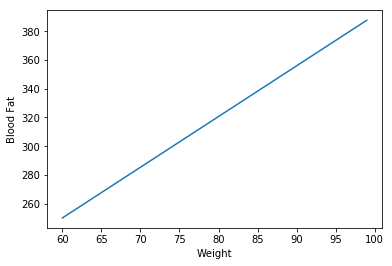

In [15]:
with tf.Session() as session:
    tf.global_variables_initializer().run()
    X, Y = inputs("data/blood_fat.txt")
    total_loss = loss(X, Y)
    train_op = train(total_loss)
    training_steps = 1000
    for step in range(training_steps):
        session.run([train_op])
    evaluate(session)
    session.close()
